In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the oreders file
data = pd.read_csv("orders.csv", encoding="Unicode Escape")

In [3]:
#checking the dataset
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
#checkin the no of rows and columns
data.shape

(3421083, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [7]:
#checking if any missing value is present in the dataset:
data.isnull().values.any()

True

In [8]:
#checking which columns contains any null value
data.loc[:, data.isna().any()].head()

,days_since_prior_order
0,NaN
1,15.0
2,21.0
3,29.0
4,28.0


In [9]:
data.shape

(3421083, 7)

In [10]:
#after removing the rows having missing values
data_filtered=data.dropna()

In [11]:
#resetted the index
data_filtered=data_filtered.reset_index(drop=True)

In [12]:
data_filtered.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2398795,1,prior,2,3,7,15.0
1,473747,1,prior,3,3,12,21.0
2,2254736,1,prior,4,4,7,29.0
3,431534,1,prior,5,4,15,28.0
4,3367565,1,prior,6,2,7,19.0


In [13]:
#verifying the removal of any missing values left
data_filtered.isnull().values.any()

False

In [14]:
data_filtered.shape

(3214874, 7)

In [15]:
data_filtered=data_filtered.drop_duplicates()

In [16]:
data_filtered.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2398795,1,prior,2,3,7,15.0
1,473747,1,prior,3,3,12,21.0
2,2254736,1,prior,4,4,7,29.0
3,431534,1,prior,5,4,15,28.0
4,3367565,1,prior,6,2,7,19.0


In [17]:
data_filtered.shape

(3214874, 7)

In [18]:
#dropping the unneseccary columns
data_filtered=data_filtered.drop(['order_hour_of_day','order_dow','eval_set','order_number','order_id'],axis=1)

In [19]:
data_filtered.head(11)

,user_id,days_since_prior_order
0,1,15.0
1,1,21.0
2,1,29.0
3,1,28.0
4,1,19.0
5,1,20.0
6,1,14.0
7,1,0.0
8,1,30.0
9,1,14.0


In [20]:
#checking the minimum values
data_filtered.min()

user_id                   1.0
days_since_prior_order    0.0
dtype: float64

In [21]:
#converted the datatype of days_since_prior column from float to integer as days can not be in float
data_filtered.days_since_prior_order=data_filtered.days_since_prior_order.astype(int)

In [22]:
#verifying the datatype
data_filtered.dtypes

user_id                   int64
days_since_prior_order    int64
dtype: object

In [23]:
#removing the rows having 0 values
data_filtered=data_filtered[data_filtered['days_since_prior_order']>0]

In [24]:
data_filtered.head()

,user_id,days_since_prior_order
0,1,15
1,1,21
2,1,29
3,1,28
4,1,19


In [25]:
#finding the recency
recency=data_filtered.groupby('user_id').days_since_prior_order.mean().reset_index()

In [26]:
#changing the name of the columns
recency.columns=['user_id','Next_Transaction']

In [27]:
#changing the type to int 
recency.Next_Transaction=recency.Next_Transaction.astype(int)

In [28]:
#finding the frequency of transaction of each customer
freq=data_filtered.groupby('user_id').days_since_prior_order.count().reset_index()

In [29]:
freq.columns=['user_id','frequency']

In [30]:
#checking the shapes in order to merge
print(recency.shape)
print(freq.shape)

(206203, 2)
(206203, 2)


In [31]:
#merged the two data frames
top_customers=pd.merge(recency,freq, on='user_id')

In [32]:
top_customers.head()

,user_id,Next_Transaction,frequency
0,1,21,9
1,2,16,14
2,3,12,12
3,4,21,4
4,5,11,4


In [33]:
top_customers['Next_Transaction'].value_counts()

14    10257
7     10027
12     9942
13     9826
10     9814
11     9811
9      9792
15     9777
16     9547
8      9545
17     9321
18     8930
19     8501
20     8155
21     7844
6      7776
22     7488
23     6631
24     6103
30     5986
5      5943
25     4903
4      4317
26     4123
27     3426
3      2591
28     2322
29     2290
2       976
1       239
Name: Next_Transaction, dtype: int64

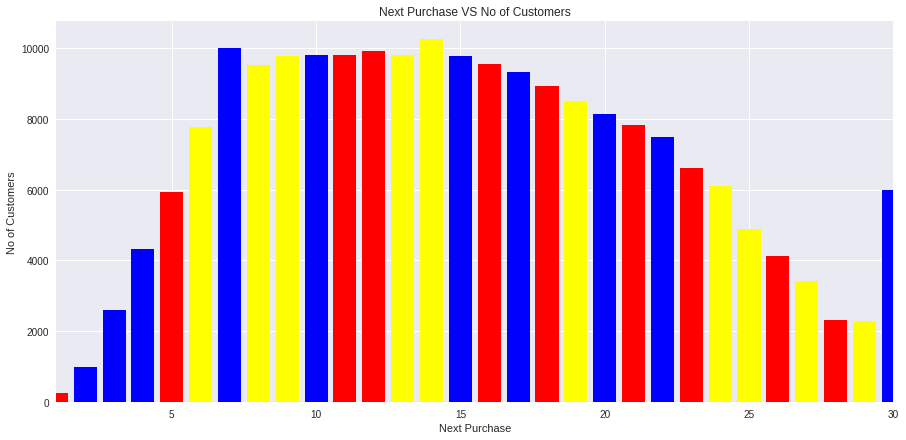

In [34]:
# Plotting the graph between Customers and their next puchase before filteration of the top customers

co = ["Yellow","Blue","Red"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(top_customers["Next_Transaction"].value_counts().index,
       top_customers["Next_Transaction"].value_counts(),color=co)

ax.set(title = "Next Purchase VS No of Customers",
       xlabel = "Next Purchase",
       ylabel = "No of Customers",
       xlim = (1,30))


plt.show()

In [35]:
print(top_customers['frequency'].min())
print(top_customers['frequency'].max())

1
99


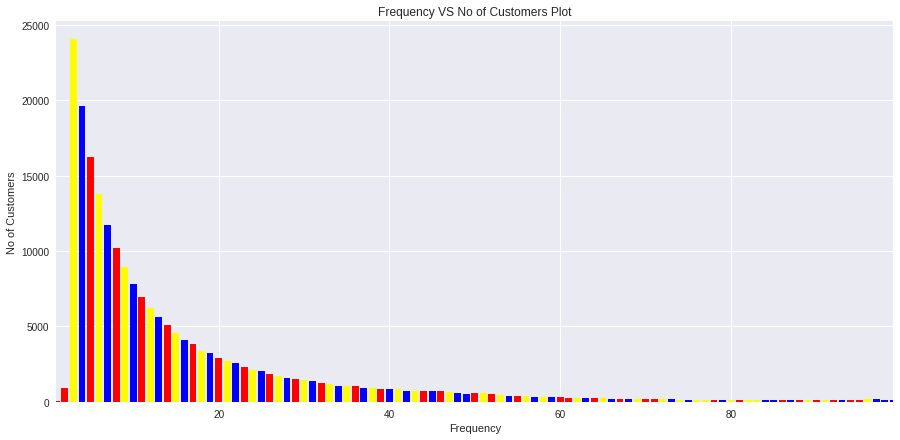

In [36]:
# Plotting the graph between Customers and their frequency before filteration of the top customers

co = ["Yellow","Blue","Red"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(top_customers["frequency"].value_counts().index,
       top_customers["frequency"].value_counts(),color=co)

ax.set(title = "Frequency VS No of Customers Plot",
       xlabel = "Frequency",
       ylabel = "No of Customers",
       xlim = (1,99))


plt.show()

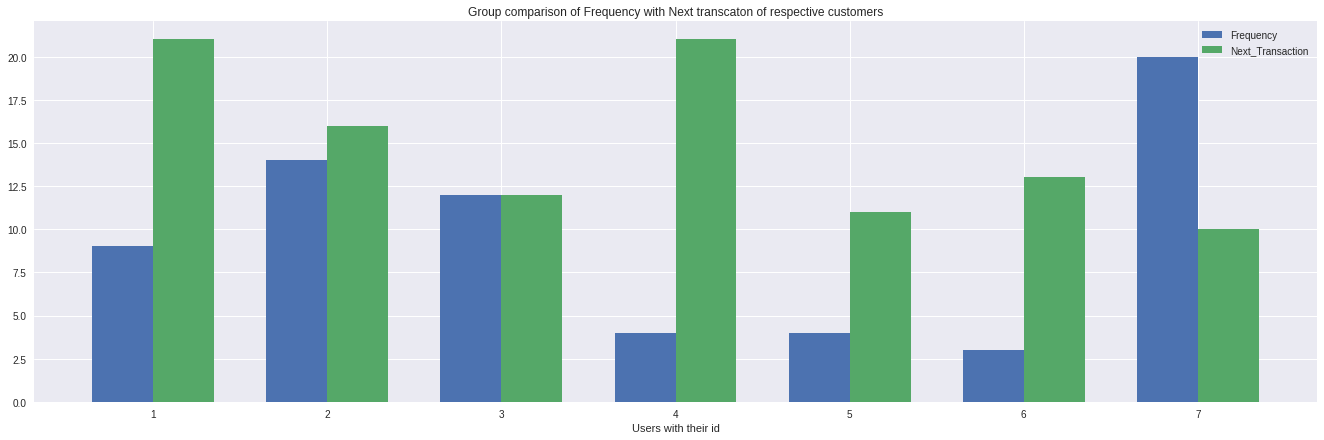

In [37]:
#Group comparison of Frequency with Next transcaton of respective customers before filteration
label=top_customers.user_id[:7]
plt.figure(figsize=(23,7))
plt.style.use("seaborn")
plt.bar(top_customers["user_id"].index[:7],top_customers["frequency"][:7],label="Frequency",width=0.35)
plt.bar(top_customers["user_id"].index[:7] +0.35,top_customers["Next_Transaction"][:7],label="Next_Transaction",width=0.35)
plt.xticks(top_customers["user_id"].index[:7]+0.35/2,label)
plt.legend()
plt.xlabel("Users with their id")
plt.title("Group comparison of Frequency with Next transcaton of respective customers" )
plt.show()

In [38]:
#setting the labels for binning
labels=['L','M','H']

In [39]:
#discretion on next transaction 
top_customers['T_quartile'] = pd.qcut(top_customers['Next_Transaction'], 3, labels)

In [40]:
#discretion on frequency 
top_customers['F_quartile'] = pd.qcut(top_customers['frequency'], 3, labels)


In [41]:
top_customers.shape

(206203, 5)

In [42]:
#Merging all the rankings
top_customers['Ranking'] = top_customers.T_quartile.astype(str)+ top_customers.F_quartile.astype(str)

In [43]:
top_customers.head(7)

,user_id,Next_Transaction,frequency,T_quartile,F_quartile,Ranking
0,1,21,9,H,M,HM
1,2,16,14,M,M,MM
2,3,12,12,M,M,MM
3,4,21,4,H,L,HL
4,5,11,4,L,L,LL
5,6,13,3,M,L,ML
6,7,10,20,L,H,LH


In [44]:
#filtering out the top customers on basis of low recency and high frequency
top_customers=top_customers[top_customers['Ranking']=='LH'].reset_index()

In [45]:
#dropped the unnecessary columns
top_customers=top_customers.drop(['index','T_quartile','F_quartile','Ranking'],axis=1)

In [46]:
top_customers.shape

(44124, 3)

In [47]:
#filtering the top customers showing frequency in descending order
top_customers=top_customers.sort_values('frequency',ascending=False).reset_index()

In [48]:
#dropping the unnecesaary column
top_customers=top_customers.drop(['index'],axis=1)

In [49]:
top_customers.shape

(44124, 3)

In [50]:
#checking the no of customers having unique frequency
top_customers['frequency'].value_counts()

30    1372
31    1370
32    1277
29    1256
16    1226
      ... 
82     103
87      99
88      99
83      94
99      88
Name: frequency, Length: 84, dtype: int64

In [51]:
#finding the minimimin which will be helpful to plot the graph
print(top_customers['frequency'].min())
print(top_customers['frequency'].value_counts()[:10])

16
30    1372
31    1370
32    1277
29    1256
16    1226
33    1213
17    1168
19    1159
28    1140
25    1135
Name: frequency, dtype: int64


In [52]:
top_customers['frequency'].value_counts().count()

84

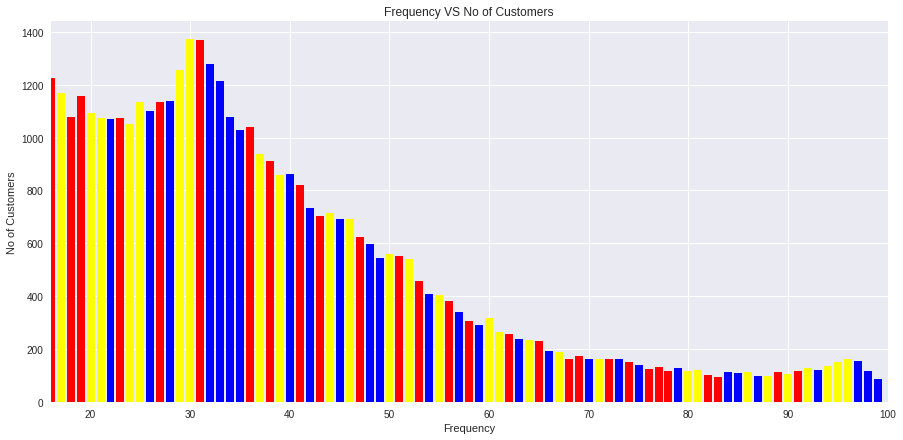

In [53]:
# Plotting the graph between Customers and their frequency after filteration of the top customers

co = ["Yellow","Red","Blue"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(top_customers["frequency"].value_counts().index,
       top_customers["frequency"].value_counts(),color=co)

ax.set(title = "Frequency VS No of Customers",
       xlabel = "Frequency",
       ylabel = "No of Customers",
       xlim = (16,100))

plt.show()

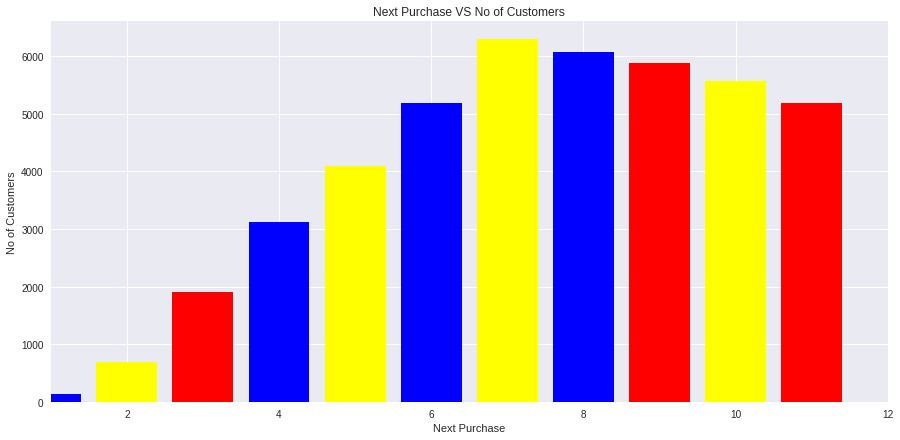

In [54]:
# Plotting the graph between Customers and their next puchase after filteration of the top customers

co = ["Yellow","Blue","Red"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(top_customers["Next_Transaction"].value_counts().index,
       top_customers["Next_Transaction"].value_counts(),color=co)

ax.set(title = "Next Purchase VS No of Customers",
       xlabel = "Next Purchase",
       ylabel = "No of Customers",
       xlim = (1,12))


plt.show()

In [55]:
top_customers.head(7)

,user_id,Next_Transaction,frequency
0,34628,2,99
1,190676,2,99
2,196163,3,99
3,138113,3,99
4,1549,3,99
5,137517,3,99
6,1563,3,99


In [56]:
label=top_customers.user_id[:7]
label

0     34628
1    190676
2    196163
3    138113
4      1549
5    137517
6      1563
Name: user_id, dtype: int64

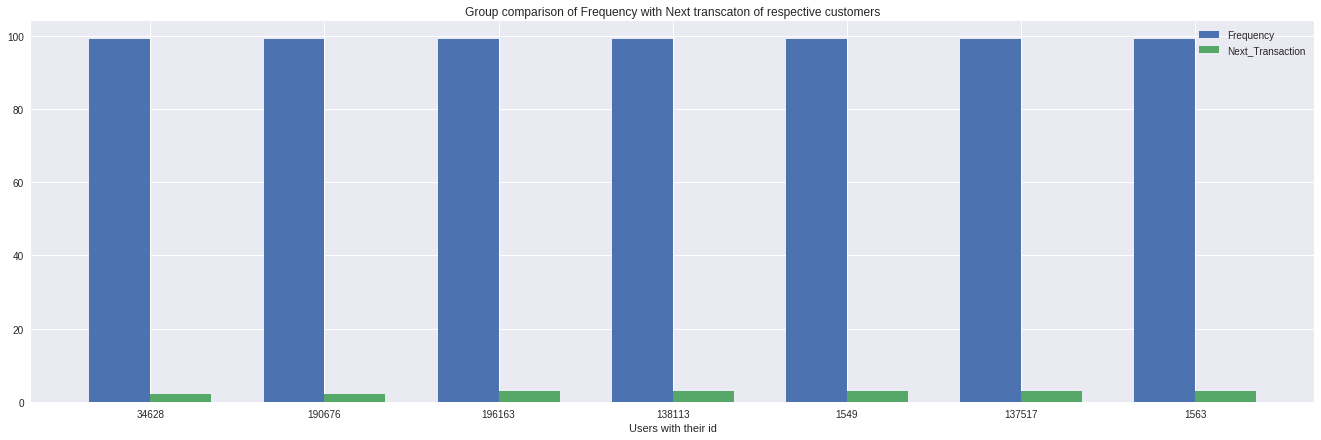

In [57]:
#Group comparison of Frequency with Next transcaton of respective customers after filteration
label=top_customers.user_id[:7]
plt.figure(figsize=(23,7))
plt.style.use("seaborn")
plt.bar(top_customers["user_id"].index[:7],top_customers["frequency"][:7],label="Frequency",width=0.35)
plt.bar(top_customers["user_id"].index[:7] +0.35,top_customers["Next_Transaction"][:7],label="Next_Transaction",width=0.35)
plt.xticks(top_customers["user_id"].index[:7]+0.35/2,label)
plt.legend()
plt.xlabel("Users with their id")
plt.title("Group comparison of Frequency with Next transcaton of respective customers" )
plt.show()